In [329]:
#######################################################
#                                                     #
#                IMPORT KNIHOVEN A DAT                #
#                                                     #
#######################################################

In [330]:
# Knihovny pro manipulaci s daty
import pandas as pd
import numpy as np

# Algoritmy pro predikci
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Algoritmus pro rozdělení dat na trénovací a testovací
from sklearn.model_selection import train_test_split

# Import metrik pro vyhodnocení přesnosti
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

# Knihovny pro vizualizaci
import matplotlib.pyplot as plt
%matplotlib inline

In [331]:
# Načtení dat do dataframů
df_availability = pd.read_csv('dostupnost.csv')
df_performance = pd.read_csv('vykon.csv')
df_quality = pd.read_csv('kvalita.csv')

In [332]:
# Ukázka načtených dat pro jednotlivé dataframy
#df_availability

In [333]:
# Ukázka načtených dat pro jednotlivé dataframy
#df_performance

In [334]:
# Ukázka načtených dat pro jednotlivé dataframy
#df_quality

In [335]:
#######################################################
#                                                     #
#                PREDIKCE DOSTUPNOSTI                 #
#              (Výchozí hyperparametry)               #
#                                                     #
#######################################################

In [336]:
# Úprava dataframu df_availability

# Odebrání sloupce s ID smeny
df_availability = df_availability.drop('id_smeny', axis=1)

# Enkódování typu směny ranní = 1, odpolední = 0
df_availability['typ_smeny'] = df_availability['typ_smeny'].map({'ranni': 1, 'odpoledni': 0})

# Enkódování operátora a typu údržby
df_enc_availability = pd.get_dummies(df_availability, columns=['operator_zam_cislo', 'typ_servisu'])

# Ukázka enkódovaných dat
#df_enc_availability

In [337]:
#Rozdělení (SPLIT) na vstupní a výstupní data (X, y)
X_a = df_enc_availability.drop(df_enc_availability.columns[7], axis=1)  # Drop pro 8. sloupec a vse ostatni do X
y_a = df_enc_availability.iloc[:,7:8]  # Drop pro vse krom 8. sloupce a ten do y

In [338]:
# Ukázka X datasetu (features)
#X_a

In [339]:
# Ukázka y datasetu (target)
#y_a

In [340]:
#Rozdělení (SPLIT) na trénovací a testovací data (Aktuálně 80 % dat trénink a 20 % dat test)
Xtrain_a, Xtest_a, Ytrain_a, Ytest_a = train_test_split(X_a,y_a, test_size = 0.20, random_state = 1)

In [341]:
#Vytvoření instancí s výchozími hyperparametry
modelLR = LinearRegression()
modelTR = DecisionTreeRegressor()
modelRF = RandomForestRegressor(random_state=1)
modelGR = GradientBoostingRegressor()

In [342]:
#Trénink modelů
modelLR.fit(Xtrain_a, Ytrain_a)
modelTR.fit(Xtrain_a, Ytrain_a)
modelRF.fit(Xtrain_a, np.array(Ytrain_a).ravel())
modelGR.fit(Xtrain_a, np.array(Ytrain_a).ravel())

GradientBoostingRegressor()

In [343]:
#Vytvoření predikcí jednotlivými algoritmy
YpredLR_a = modelLR.predict(Xtest_a)
YpredTR_a = modelTR.predict(Xtest_a)
YpredRF_a = modelRF.predict(Xtest_a)
YpredGR_a = modelGR.predict(Xtest_a)

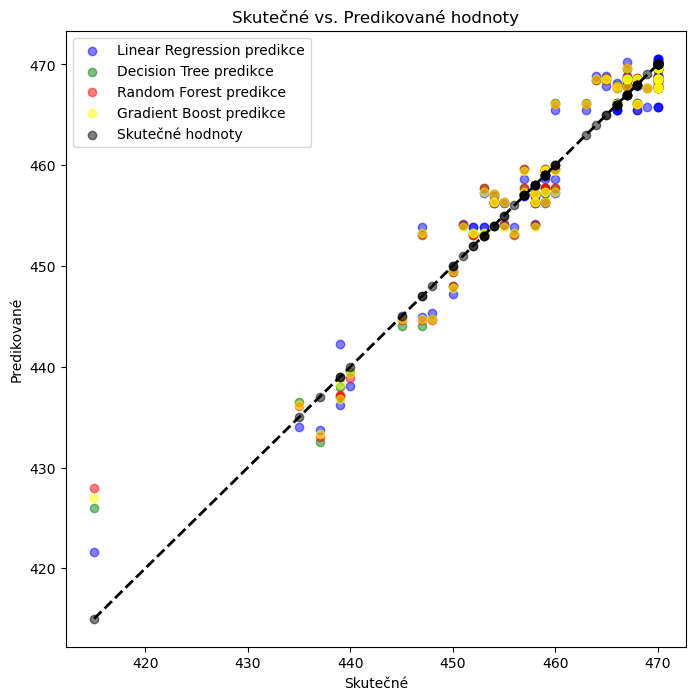

In [344]:
# Scatter plot pro všechny predikce
plt.figure(figsize=(8, 8))

plt.scatter(Ytest_a, YpredLR_a, alpha=0.5, color='blue', label='Linear Regression predikce')
plt.scatter(Ytest_a, YpredTR_a, alpha=0.5, color='green', label='Decision Tree predikce')
plt.scatter(Ytest_a, YpredRF_a, alpha=0.5, color='red', label='Random Forest predikce')
plt.scatter(Ytest_a, YpredGR_a, alpha=0.5, color='yellow', label='Gradient Boost predikce')
plt.scatter(Ytest_a, Ytest_a, alpha=0.5, color='black', label = 'Skutečné hodnoty')

plt.plot([Ytest_a.min(), Ytest_a.max()], [Ytest_a.min(), Ytest_a.max()], 'k--', lw=2)
plt.xlabel('Skutečné')
plt.ylabel('Predikované')
plt.title('Skutečné vs. Predikované hodnoty')
plt.legend()
plt.show()

In [345]:
#Výpis MAE pro predikci dostupnosti
print("MAE všech modelů (nižší = lepší) \n")
print("Linear Regressor MAE: \n" + str(mean_absolute_error(Ytest_a, YpredLR_a)) + "\n")
print("Decision Tree Regressor MAE: \n" + str(mean_absolute_error(Ytest_a, YpredTR_a)) + "\n")
print("Random Forest Regressor MAE: \n" + str(mean_absolute_error(Ytest_a, YpredRF_a)) + "\n")
print("Gradient Boost Regressor MAE: \n" + str(mean_absolute_error(Ytest_a, YpredGR_a)) + "\n")

MAE všech modelů (nižší = lepší) 

Linear Regressor MAE: 
1.7672413793103448

Decision Tree Regressor MAE: 
1.7059797482211285

Random Forest Regressor MAE: 
1.7133604630970205

Gradient Boost Regressor MAE: 
1.6830850982237306



In [346]:
#Výpis MSE pro predikci dostupnosti
print("MSE všech modelů (nižší = lepší) \n")
print("Linear Regressor MSE: \n" + str(mean_squared_error(Ytest_a, YpredLR_a)) + "\n")
print("Decision Tree Regressor MSE: \n" + str(mean_squared_error(Ytest_a, YpredTR_a)) + "\n")
print("Random Forest Regressor MSE: \n" + str(mean_squared_error(Ytest_a, YpredRF_a)) + "\n")
print("Gradient Boost Regressor MSE: \n" + str(mean_squared_error(Ytest_a, YpredGR_a)) + "\n")

MSE všech modelů (nižší = lepší) 

Linear Regressor MSE: 
5.329022988505747

Decision Tree Regressor MSE: 
5.64411887074943

Random Forest Regressor MSE: 
6.098851081787038

Gradient Boost Regressor MSE: 
5.758418005666085



In [347]:
#Výpis R2 score pro predikci dostupnosti
print("R2 score všech modelů (bližší k 1 = lepší) \n")
print("Linear Regressor R2: \n" + str(r2_score(Ytest_a, YpredLR_a)) + "\n")
print("Decision Tree Regressor R2: \n" + str(r2_score(Ytest_a, YpredTR_a)) + "\n")
print("Random Forest Regressor R2: \n" + str(r2_score(Ytest_a, YpredRF_a)) + "\n")
print("Gradient Boost Regressor R2: \n" + str(r2_score(Ytest_a, YpredGR_a)) + "\n")

R2 score všech modelů (bližší k 1 = lepší) 

Linear Regressor R2: 
0.9497567582043891

Decision Tree Regressor R2: 
0.9467859625004641

Random Forest Regressor R2: 
0.9424986437028731

Gradient Boost Regressor R2: 
0.9457083242382474



In [348]:
#Výpis MAPE pro predikci dostupnosti
print("MAPE všech modelů (nižší = lepší) \n")
print("Linear Regressor MAPE: \n" + str(mean_absolute_percentage_error(Ytest_a, YpredLR_a)) + "\n")
print("Decision Tree Regressor MAPE: \n" + str(mean_absolute_percentage_error(Ytest_a, YpredTR_a)) + "\n")
print("Random Forest Regressor MAPE: \n" + str(mean_absolute_percentage_error(Ytest_a, YpredRF_a)) + "\n")
print("Gradient Boost Regressor MAPE: \n" + str(mean_absolute_percentage_error(Ytest_a, YpredGR_a)) + "\n")

MAPE všech modelů (nižší = lepší) 

Linear Regressor MAPE: 
0.003867105202368025

Decision Tree Regressor MAPE: 
0.0037473544191002025

Random Forest Regressor MAPE: 
0.003767874953854891

Gradient Boost Regressor MAPE: 
0.0036981713473332105



In [349]:
#######################################################
#                                                     #
#                 PREDIKCE VÝKONU                     #
#              (Výchozí hyperparametry)               #
#                                                     #
#######################################################

In [350]:
# Úprava df_performance

# Opětovný import kvůli debugování
df_performance = pd.read_csv('vykon.csv')

# Odebrání sloupce s ID smeny
df_performance = df_performance.drop('id_smeny', axis=1)

# Enkódování typu směny ranní = 1, odpolední = 0
df_performance['typ_smeny'] = df_performance['typ_smeny'].map({'ranni': 1, 'odpoledni': 0})

# Enkódování operátora
df_enc_performance = pd.get_dummies(df_performance, columns=['operator_zam_cislo'])

# Ukázka enkódovaných dat
df_enc_performance

,planovana_delka_smeny(min),typ_smeny,planovany_pocet_serizeni,provozni_doba_od_udrzby_vykonu(min),naplanovana_udrzba_vykonu,index_složitosti_vyrobku_na_smenu,planovany_potencial_vyroby_ks,planovany_cycle_time_na_smenu(min),skutecny_cycle_time(min),operator_zam_cislo_661,operator_zam_cislo_688,operator_zam_cislo_736,operator_zam_cislo_968
0,480,1,1,4571,1,13,60,7.5,9.040,False,False,True,False
1,480,0,3,447,0,35,60,7.5,9.000,False,False,False,True
2,480,1,1,887,0,19,67,7.0,8.080,False,False,True,False
3,480,0,1,1356,0,13,59,8.0,9.090,False,False,False,True
4,480,1,1,1821,0,18,94,5.0,5.610,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,480,0,1,3179,0,19,63,7.5,8.925,False,False,False,True
428,480,1,2,3649,0,28,61,7.5,9.450,False,False,True,False
429,480,0,1,4104,0,13,85,5.5,6.480,False,False,False,True
430,480,1,1,4574,1,17,60,7.5,9.040,True,False,False,False


In [351]:
#Rozdělení (SPLIT) na vstupní a výstupní data (X, y)
X_p = df_enc_performance.drop(df_enc_performance.columns[8], axis=1)  # Drop pro 9. sloupec a vse ostatni do X
y_p = df_enc_performance.iloc[:,8:9]  # Drop pro vse krom 9. sloupce a ten do y

In [354]:
# Ukázka X datasetu (features)
X_p

,planovana_delka_smeny(min),typ_smeny,planovany_pocet_serizeni,provozni_doba_od_udrzby_vykonu(min),naplanovana_udrzba_vykonu,index_složitosti_vyrobku_na_smenu,planovany_potencial_vyroby_ks,planovany_cycle_time_na_smenu(min),operator_zam_cislo_661,operator_zam_cislo_688,operator_zam_cislo_736,operator_zam_cislo_968
0,480,1,1,4571,1,13,60,7.5,False,False,True,False
1,480,0,3,447,0,35,60,7.5,False,False,False,True
2,480,1,1,887,0,19,67,7.0,False,False,True,False
3,480,0,1,1356,0,13,59,8.0,False,False,False,True
4,480,1,1,1821,0,18,94,5.0,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
427,480,0,1,3179,0,19,63,7.5,False,False,False,True
428,480,1,2,3649,0,28,61,7.5,False,False,True,False
429,480,0,1,4104,0,13,85,5.5,False,False,False,True
430,480,1,1,4574,1,17,60,7.5,True,False,False,False


In [355]:
# Ukázka y datasetu (target)
y_p

,skutecny_cycle_time(min)
0,9.040
1,9.000
2,8.080
3,9.090
4,5.610
...,...
427,8.925
428,9.450
429,6.480
430,9.040


In [356]:
#Rozdělení (SPLIT) na trénovací a testovací data (Aktuálně 80 % dat trénink a 20 % dat test)
Xtrain_p, Xtest_p, Ytrain_p, Ytest_p = train_test_split(X_p,y_p, test_size = 0.20, random_state = 1)

In [357]:
#Vytvoření instancí s výchozími hyperparametry
modelLR_p = LinearRegression()
modelTR_p = DecisionTreeRegressor()
modelRF_p = RandomForestRegressor(random_state=1)
modelGR_p = GradientBoostingRegressor()

In [358]:
#Trénink modelů
modelLR_p.fit(Xtrain_p, Ytrain_p)
modelTR_p.fit(Xtrain_p, Ytrain_p)
modelRF_p.fit(Xtrain_p, np.array(Ytrain_p).ravel())
modelGR_p.fit(Xtrain_p, np.array(Ytrain_p).ravel())

GradientBoostingRegressor()

In [359]:
#Vytvoření predikcí jednotlivými algoritmy
YpredLR_p = modelLR_p.predict(Xtest_p)
YpredTR_p = modelTR_p.predict(Xtest_p)
YpredRF_p = modelRF_p.predict(Xtest_p)
YpredGR_p = modelGR_p.predict(Xtest_p)

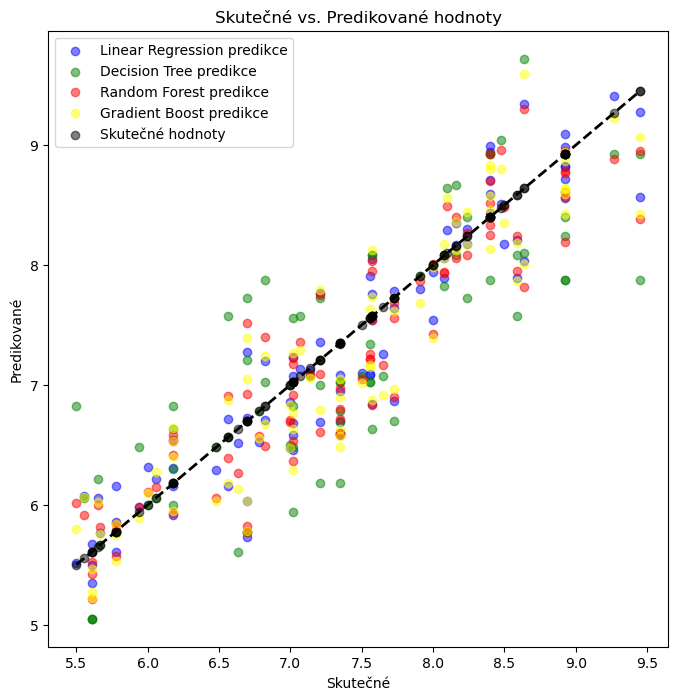

In [360]:
# Scatter plot pro všechny predikce
plt.figure(figsize=(8, 8))

plt.scatter(Ytest_p, YpredLR_p, alpha=0.5, color='blue', label='Linear Regression predikce')
plt.scatter(Ytest_p, YpredTR_p, alpha=0.5, color='green', label='Decision Tree predikce')
plt.scatter(Ytest_p, YpredRF_p, alpha=0.5, color='red', label='Random Forest predikce')
plt.scatter(Ytest_p, YpredGR_p, alpha=0.5, color='yellow', label='Gradient Boost predikce')
plt.scatter(Ytest_p, Ytest_p, alpha=0.5, color='black', label = 'Skutečné hodnoty')

plt.plot([Ytest_p.min(), Ytest_p.max()], [Ytest_p.min(), Ytest_p.max()], 'k--', lw=2)
plt.xlabel('Skutečné')
plt.ylabel('Predikované')
plt.title('Skutečné vs. Predikované hodnoty')
plt.legend()
plt.show()

In [361]:
#Výpis MAE
print("MAE všech modelů (nižší = lepší) \n")
print("Linear Regressor MAE: \n" + str(mean_absolute_error(Ytest_p, YpredLR_p)) + "\n")
print("Decision Tree Regressor MAE: \n" + str(mean_absolute_error(Ytest_p, YpredTR_p)) + "\n")
print("Random Forest Regressor MAE: \n" + str(mean_absolute_error(Ytest_p, YpredRF_p)) + "\n")
print("Gradient Boost Regressor MAE: \n" + str(mean_absolute_error(Ytest_p, YpredGR_p)) + "\n")

MAE všech modelů (nižší = lepší) 

Linear Regressor MAE: 
0.3007923705153323

Decision Tree Regressor MAE: 
0.4515229885057472

Random Forest Regressor MAE: 
0.3462210536398467

Gradient Boost Regressor MAE: 
0.3404832378621504



In [362]:
#Výpis MSE
print("MSE všech modelů (nižší = lepší) \n")
print("Linear Regressor MSE: \n" + str(mean_squared_error(Ytest_p, YpredLR_p)) + "\n")
print("Decision Tree Regressor MSE: \n" + str(mean_squared_error(Ytest_p, YpredTR_p)) + "\n")
print("Random Forest Regressor MSE: \n" + str(mean_squared_error(Ytest_p, YpredRF_p)) + "\n")
print("Gradient Boost Regressor MSE: \n" + str(mean_squared_error(Ytest_p, YpredGR_p)) + "\n")

MSE všech modelů (nižší = lepší) 

Linear Regressor MSE: 
0.14756463403789344

Decision Tree Regressor MSE: 
0.3526667385057471

Random Forest Regressor MSE: 
0.18122604444281687

Gradient Boost Regressor MSE: 
0.1786074506175043



In [363]:
#Výpis R2 score
print("R2 score všech modelů (bližší k 1 = lepší) \n")
print("Linear Regressor R2: \n" + str(r2_score(Ytest_p, YpredLR_p)) + "\n")
print("Decision Tree Regressor R2: \n" + str(r2_score(Ytest_p, YpredTR_p)) + "\n")
print("Random Forest Regressor R2: \n" + str(r2_score(Ytest_p, YpredRF_p)) + "\n")
print("Gradient Boost Regressor R2: \n" + str(r2_score(Ytest_p, YpredGR_p)) + "\n")

R2 score všech modelů (bližší k 1 = lepší) 

Linear Regressor R2: 
0.8638269072367313

Decision Tree Regressor R2: 
0.6745580618948956

Random Forest Regressor R2: 
0.8327640554125265

Gradient Boost Regressor R2: 
0.8351805017528606



In [364]:
#Výpis MAPE
print("MAPE všech modelů (nižší = lepší) \n")
print("Linear Regressor MAPE: \n" + str(mean_absolute_percentage_error(Ytest_p, YpredLR_p)) + "\n")
print("Decision Tree Regressor MAPE: \n" + str(mean_absolute_percentage_error(Ytest_p, YpredTR_p)) + "\n")
print("Random Forest Regressor MAPE: \n" + str(mean_absolute_percentage_error(Ytest_p, YpredRF_p)) + "\n")
print("Gradient Boost Regressor MAPE: \n" + str(mean_absolute_percentage_error(Ytest_p, YpredGR_p)) + "\n")

MAPE všech modelů (nižší = lepší) 

Linear Regressor MAPE: 
0.0410745563965584

Decision Tree Regressor MAPE: 
0.06191542101661824

Random Forest Regressor MAPE: 
0.047184371941097536

Gradient Boost Regressor MAPE: 
0.04666269998937168



In [365]:
#######################################################
#                                                     #
#                 PREDIKCE KVALITY                    #
#              (Výchozí hyperparametry)               #
#                                                     #
#######################################################

In [366]:
# Úprava dataframu df_quality

#Opětovný import kvůli debugování
df_quality = pd.read_csv('kvalita.csv')

# Odebrání sloupce s ID smeny
df_quality = df_quality.drop('id_smeny', axis=1)

# Enkódování typu směny ranní = 1, odpolední = 0
df_quality['typ_smeny'] = df_quality['typ_smeny'].map({'ranni': 1, 'odpoledni': 0})

df_quality['skutecna_kvalita'] = df_quality['skutecna_kvalita'] * 100

# Enkódování operátora a typu údržby
df_enc_quality = pd.get_dummies(df_quality, columns=['operator_zam_cislo'])

# Ukázka enkódovaných dat
df_enc_quality

,planovana_delka_smeny(min),typ_smeny,planovany_pocet_serizeni,pocet_vyrobenych_ks_od_vymeny_nastroje,naplanovana_vymena_nastroje,index_složitosti_vyrobku_na_smenu,planovana_kvalita,skutecna_kvalita,operator_zam_cislo_661,operator_zam_cislo_688,operator_zam_cislo_736,operator_zam_cislo_968
0,480,1,1,109,0,13,100,100.0,False,False,True,False
1,480,0,3,157,0,35,100,98.0,False,False,False,True
2,480,1,1,215,0,19,100,100.0,False,False,True,False
3,480,0,1,266,0,13,100,98.0,False,False,False,True
4,480,1,1,348,0,18,100,100.0,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
427,480,0,1,4978,0,19,100,100.0,False,False,False,True
428,480,1,2,5026,0,28,100,98.0,False,False,True,False
429,480,0,1,5098,0,13,100,99.0,False,False,False,True
430,480,1,1,5147,0,17,100,98.0,True,False,False,False


In [367]:
#Rozdělení (SPLIT) na vstupní a výstupní data (X, y)
X_q = df_enc_quality.drop(df_enc_quality.columns[7], axis=1)  # Drop pro 8. sloupec a vse ostatni do X
y_q = df_enc_quality.iloc[:,7:8]  # Drop pro vse krom 8. sloupce a ten do y

In [368]:
# Ukázka X datasetu (features)
X_q

,planovana_delka_smeny(min),typ_smeny,planovany_pocet_serizeni,pocet_vyrobenych_ks_od_vymeny_nastroje,naplanovana_vymena_nastroje,index_složitosti_vyrobku_na_smenu,planovana_kvalita,operator_zam_cislo_661,operator_zam_cislo_688,operator_zam_cislo_736,operator_zam_cislo_968
0,480,1,1,109,0,13,100,False,False,True,False
1,480,0,3,157,0,35,100,False,False,False,True
2,480,1,1,215,0,19,100,False,False,True,False
3,480,0,1,266,0,13,100,False,False,False,True
4,480,1,1,348,0,18,100,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
427,480,0,1,4978,0,19,100,False,False,False,True
428,480,1,2,5026,0,28,100,False,False,True,False
429,480,0,1,5098,0,13,100,False,False,False,True
430,480,1,1,5147,0,17,100,True,False,False,False


In [369]:
# Ukázka y datasetu (target)
y_q

,skutecna_kvalita
0,100.0
1,98.0
2,100.0
3,98.0
4,100.0
...,...
427,100.0
428,98.0
429,99.0
430,98.0


In [370]:
#Rozdělení (SPLIT) na trénovací a testovací data (Aktuálně 80 % dat trénink a 20 % dat test)
Xtrain_q, Xtest_q, Ytrain_q, Ytest_q = train_test_split(X_q,y_q, test_size = 0.20, random_state = 1)

In [371]:
#Vytvoření instancí s výchozími hyperparametry
modelLR_q = LinearRegression()
modelTR_q = DecisionTreeRegressor()
modelRF_q = RandomForestRegressor(random_state=1)
modelGR_q = GradientBoostingRegressor()

In [372]:
#Trénink modelů
modelLR_q.fit(Xtrain_q, Ytrain_q)
modelTR_q.fit(Xtrain_q, Ytrain_q)
modelRF_q.fit(Xtrain_q, np.array(Ytrain_q).ravel())
modelGR_q.fit(Xtrain_q, np.array(Ytrain_q).ravel())

GradientBoostingRegressor()

In [373]:
#Vytvoření predikcí jednotlivými algoritmy
YpredLR_q = modelLR_q.predict(Xtest_q)
YpredTR_q = modelTR_q.predict(Xtest_q)
YpredRF_q = modelRF_q.predict(Xtest_q)
YpredGR_q = modelGR_q.predict(Xtest_q)

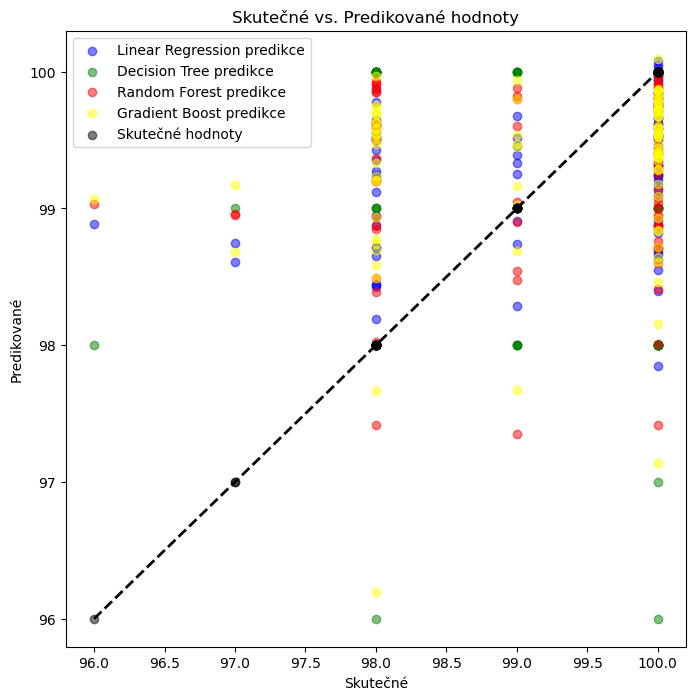

In [374]:
# Scatter plot pro všechny predikce
plt.figure(figsize=(8, 8))

plt.scatter(Ytest_q, YpredLR_q, alpha=0.5, color='blue', label='Linear Regression predikce')
plt.scatter(Ytest_q, YpredTR_q, alpha=0.5, color='green', label='Decision Tree predikce')
plt.scatter(Ytest_q, YpredRF_q, alpha=0.5, color='red', label='Random Forest predikce')
plt.scatter(Ytest_q, YpredGR_q, alpha=0.5, color='yellow', label='Gradient Boost predikce')
plt.scatter(Ytest_q, Ytest_q, alpha=0.5, color='black', label = 'Skutečné hodnoty')

plt.plot([Ytest_q.min(), Ytest_q.max()], [Ytest_q.min(), Ytest_q.max()], 'k--', lw=2)
plt.xlabel('Skutečné')
plt.ylabel('Predikované')
plt.title('Skutečné vs. Predikované hodnoty')
plt.legend()
plt.show()

In [375]:
#Výpis MAE
print("MAE všech modelů (nižší = lepší) \n")
print("Linear Regressor MAE: \n" + str(mean_absolute_error(Ytest_q, YpredLR_q)) + "\n")
print("Decision Tree Regressor MAE: \n" + str(mean_absolute_error(Ytest_q, YpredTR_q)) + "\n")
print("Random Forest Regressor MAE: \n" + str(mean_absolute_error(Ytest_q, YpredRF_q)) + "\n")
print("Gradient Boost Regressor MAE: \n" + str(mean_absolute_error(Ytest_q, YpredGR_q)) + "\n")

MAE všech modelů (nižší = lepší) 

Linear Regressor MAE: 
0.8290299954504533

Decision Tree Regressor MAE: 
1.0229885057471264

Random Forest Regressor MAE: 
0.8677011494252866

Gradient Boost Regressor MAE: 
0.8595294840499134



In [376]:
#Výpis MSE
print("MSE všech modelů (nižší = lepší) \n")
print("Linear Regressor MSE: \n" + str(mean_squared_error(Ytest_q, YpredLR_q)) + "\n")
print("Decision Tree Regressor MSE: \n" + str(mean_squared_error(Ytest_q, YpredTR_q)) + "\n")
print("Random Forest Regressor MSE: \n" + str(mean_squared_error(Ytest_q, YpredRF_q)) + "\n")
print("Gradient Boost Regressor MSE: \n" + str(mean_squared_error(Ytest_q, YpredGR_q)) + "\n")

MSE všech modelů (nižší = lepší) 

Linear Regressor MSE: 
1.0111526267715523

Decision Tree Regressor MSE: 
1.9885057471264367

Random Forest Regressor MSE: 
1.2096931034482747

Gradient Boost Regressor MSE: 
1.1573571873441322



In [377]:
#Výpis R2 score
print("R2 score všech modelů (bližší k 1 = lepší) \n")
print("Linear Regressor R2: \n" + str(r2_score(Ytest_q, YpredLR_q)) + "\n")
print("Decision Tree Regressor R2: \n" + str(r2_score(Ytest_q, YpredTR_q)) + "\n")
print("Random Forest Regressor R2: \n" + str(r2_score(Ytest_q, YpredRF_q)) + "\n")
print("Gradient Boost Regressor R2: \n" + str(r2_score(Ytest_q, YpredGR_q)) + "\n")

R2 score všech modelů (bližší k 1 = lepší) 

Linear Regressor R2: 
0.0034616885372554806

Decision Tree Regressor R2: 
-0.9597656249999995

Random Forest Regressor R2: 
-0.19220925781249876

Gradient Boost Regressor R2: 
-0.1406297592457988



In [378]:
#Výpis MAPE
print("MAPE všech modelů (nižší = lepší) \n")
print("Linear Regressor MAPE: \n" + str(mean_absolute_percentage_error(Ytest_q, YpredLR_q)) + "\n")
print("Decision Tree Regressor MAPE: \n" + str(mean_absolute_percentage_error(Ytest_q, YpredTR_q)) + "\n")
print("Random Forest Regressor MAPE: \n" + str(mean_absolute_percentage_error(Ytest_q, YpredRF_q)) + "\n")
print("Gradient Boost Regressor MAPE: \n" + str(mean_absolute_percentage_error(Ytest_q, YpredGR_q)) + "\n")

MAPE všech modelů (nižší = lepší) 

Linear Regressor MAPE: 
0.00838727247321662

Decision Tree Regressor MAPE: 
0.01034978934641217

Random Forest Regressor MAPE: 
0.008786164712521291

Gradient Boost Regressor MAPE: 
0.008706239430879312



In [ ]:
#######################################################
#                                                     #
#                 PREDIKCE KVALITY                    #
#               (Alternativní přístup)                #
#                                                     #
#######################################################

In [219]:
# Úprava dataframu df_quality

#Opětovný import kvůli debugování
df_quality = pd.read_csv('kvalita.csv')

# Odebrání sloupce s ID smeny
df_quality = df_quality.drop('id_smeny', axis=1)

# Enkódování typu směny ranní = 1, odpolední = 0
df_quality['typ_smeny'] = df_quality['typ_smeny'].map({'ranni': 1, 'odpoledni': 0})

df_quality['skutecna_kvalita'] = df_quality['skutecna_kvalita'] * 100

df_quality = df_quality.drop('planovana_kvalita', axis=1)

df_quality['skutecna_kvalita'] = df_quality['skutecna_kvalita'].apply(lambda x: 1 if x == 100 else 0 if x < 100 else x)


# Enkódování operátora a typu údržby
df_enc_quality = pd.get_dummies(df_quality, columns=['operator_zam_cislo'])

# Ukázka enkódovaných dat
df_enc_quality

,planovana_delka_smeny(min),typ_smeny,planovany_pocet_serizeni,pocet_vyrobenych_ks_od_vymeny_nastroje,naplanovana_vymena_nastroje,index_složitosti_vyrobku_na_smenu,skutecna_kvalita,operator_zam_cislo_661,operator_zam_cislo_688,operator_zam_cislo_736,operator_zam_cislo_968
0,480,1,1,109,0,13,1,False,False,True,False
1,480,0,3,157,0,35,0,False,False,False,True
2,480,1,1,215,0,19,1,False,False,True,False
3,480,0,1,266,0,13,0,False,False,False,True
4,480,1,1,348,0,18,1,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
427,480,0,1,4978,0,19,1,False,False,False,True
428,480,1,2,5026,0,28,0,False,False,True,False
429,480,0,1,5098,0,13,0,False,False,False,True
430,480,1,1,5147,0,17,0,True,False,False,False


In [379]:
#######################################################
#                                                     #
#                PREDIKCE DOSTUPNOSTI                 #
#             (Upravene hyperparametry)               #
#                                                     #
#######################################################

#Zatím není řešeno - nedošlo ke zlepšení

In [380]:
#from sklearn.model_selection import GridSearchCV

In [381]:
#model_cv = GridSearchCV(estimator=modelGR, param_grid=param_grid, cv=3, n_jobs=-1)

In [382]:
#param_grid = {
#    'n_estimators': [1, 3, 5, 10, 50, 100, 250, 500, 1000],
#    'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
#    'max_depth': [1, 3, 5, 7, 9, 15, 20],
#}

In [383]:
#model_cv.fit(Xtrain_a, np.array(Ytrain_a).ravel())

In [384]:
#Ypred_cv = model_cv.predict(Xtest_a)

In [385]:
#model_cv.best_score_

In [386]:
#model_cv.best_params_

In [ ]:
#hyperparams = {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
#{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
#modelGR2 = GradientBoostingRegressor(**hyperparams)